# 1.Import the libraries and Load the dataset

In [8]:
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('advertising-1.csv',header=0)

In [ ]:
df.head()

In [ ]:
df.isnull().any()
##no null values to replace

# 2.Split features and labels

In [ ]:
y=df['Clicked on Ad']

In [ ]:
X=df.drop(columns=['Clicked on Ad'])

In [ ]:
X.head()

# 3.Split train and test data

## Apart from splitting training and test we will do data preprocessing to handle non numeric columns

In [8]:
##20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
##data pre-processing for training

In [10]:
## Taking out the numeric features
X_train_numeric=X_train[['Daily Time Spent on Site','Age', 'Area Income','Daily Internet Usage','Male']]

In [11]:
## Preprocsssing the date to make it numeric - we will take day of week to make it numeric and add it to rest of the numeric fields

X_train_numeric=pd.concat([X_train_numeric,pd.to_datetime(X_train.Timestamp).dt.dayofweek],axis=1)


In [12]:
## Prerocessing the 'Ad Topic Line' column by tokenizing it
tokenizer=Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train['Ad Topic Line'])
sequences = tokenizer.texts_to_sequences(X_train['Ad Topic Line'])
padded = pad_sequences(sequences, maxlen=6) ## max len =6 as the texts are quiet small
X_train_nlp= np.array(padded) ## padding to make all sequences similar

In [13]:
##We will ignore the country and city field

In [14]:
## Concatenating all the train data for training
X_train=np.concatenate((X_train_numeric,X_train_nlp),axis=1)

In [15]:
## Before training we will scale the data using standard scaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)

In [16]:
X_train.shape

(800, 12)

# 4.Implement ANN Classifier using Keras

In [17]:
## Implementing a single hidden layer ANN as dataset is simple -- to avoid overfitting
## also added some regulariziation as i could see overfitting
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[12]),
    keras.layers.Dense(25, activation="relu",kernel_regularizer=regularizers.l1_l2(l1=0.1,l2=0.1)), ## Relu widely used activation in industry
    keras.layers.Dense(1, activation="sigmoid") ## binary classification hence sigmoid
])

In [18]:
## compiling
model.compile(loss="binary_crossentropy", ## binary crross entropy loss
              optimizer=keras.optimizers.Adam(lr=0.001), ## adam optimizer for faster convergence
              metrics=["accuracy"]) ## balanced class probelm hence accuracy

In [19]:
## saving a history object and splitting for validation 10%
history=model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30
23/23 [==============================] - 1s 19ms/step - loss: 8.6035 - accuracy: 0.4431 - val_loss: 7.8753 - val_accuracy: 0.4000
Epoch 2/30
23/23 [==============================] - 0s 5ms/step - loss: 7.5761 - accuracy: 0.4941 - val_loss: 6.9530 - val_accuracy: 0.4500
Epoch 3/30
23/23 [==============================] - 0s 5ms/step - loss: 6.7219 - accuracy: 0.4789 - val_loss: 6.1187 - val_accuracy: 0.5125
Epoch 4/30
23/23 [==============================] - 0s 5ms/step - loss: 5.8845 - accuracy: 0.5540 - val_loss: 5.3570 - val_accuracy: 0.5750
Epoch 5/30
23/23 [==============================] - 0s 5ms/step - loss: 5.1564 - accuracy: 0.6119 - val_loss: 4.6812 - val_accuracy: 0.6125
Epoch 6/30
23/23 [==============================] - 0s 5ms/step - loss: 4.5076 - accuracy: 0.6681 - val_loss: 4.0679 - val_accuracy: 0.6500
Epoch 7/30
23/23 [==============================] - 0s 5ms/step - loss: 3.9068 - accuracy: 0.7557 - val_loss: 3.5138 - val_accuracy: 0.7375
Epoch 8/30
23/23 [=

(0.0, 1.0)

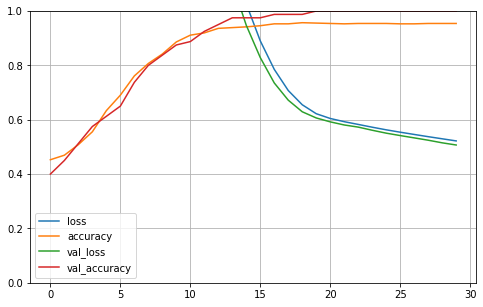

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

## the graphs show the simplicity of the dataset , even a single layer ANN tends to overfit but the regularisation has helped

## 5.Calculate accuracy measures

In [21]:
## using the test set to calculate , first we process the test set for prediction
#NOTE:Only transform method we use, no fits as this is test data

In [22]:
X_test_numeric=X_test[['Daily Time Spent on Site','Age', 'Area Income','Daily Internet Usage','Male']]
X_test_numeric=pd.concat([X_test_numeric,pd.to_datetime(X_test.Timestamp).dt.dayofweek],axis=1)
sequences = tokenizer.texts_to_sequences(X_test['Ad Topic Line'])
padded = pad_sequences(sequences, maxlen=6) 
X_test_nlp= np.array(padded)
X_test=np.concatenate((X_test_numeric,X_test_nlp),axis=1)
X_test=ss.transform(X_test)

In [23]:
## evaluating model accuracy
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.9500


[0.5213058590888977, 0.949999988079071]